# PHYSICAL ACTIVITY MONITORING   
* help for developing hardware device.

Candidate number : 277241

# Introduction
The aim of this project is to help for developing hardware device which can determine the physical activity performing by a person for that we got PAMAP2 Physical Activity Monitoring Dataset.   
The data set contains  18 different physical activities like rope jumping,cycling  performed by 9 subjects who wored 3 inertial measurement units and  heart rate monitor.The data is in .dat file which includes the activities of that subject. There are 54 features in those 18 activities 12 are protocol activities and remaining are optinal .So,here we will use only 12 activities for our analysis and for our model building .  
* steps involved 
Loading and reading the data from .data files.  
Cleaning the data.  
Performing the Exploratory Data Analysis.  
Model building & Evaluation of model.    
Conclusion.



In [1]:
#importing essential modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
import sklearn.model_selection as cross_validation


# Loading/Reading the data   
* we have 9 subjects.dat files and given subjects id's from 1 to 9.  
* After loading the data into data frame **(phy_data)** we got **2872533** datapoints(rows) and **56** columns(features).

In [2]:
# Load  all the data
list_of_files = ['subject101.dat',
                 'subject102.dat',
                 'subject103.dat',
                 'subject104.dat',
                 'subject105.dat',
                 'subject106.dat',
                 'subject107.dat',
                 'subject108.dat',
                 'subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature',
           'hand_acc16_1', 'hand_acc16_2', 'hand_acc16_3',
           'hand_acc6_1', 'hand_acc6_2', 'hand_acc6_3',
           'hand_gyro1', 'hand_gyro2', 'hand_gyro3',
           'hand_magne1', 'hand_magne2', 'hand_magne3',
           'hand_orientation1', 'hand_orientation2', 'hand_orientation3', 'hand_orientation4']

IMUchest = ['chestTemperature',
           'chest_acc16_1', 'chest_acc16_2', 'chest_acc16_3',
           'chest_acc6_1', 'chest_acc6_2', 'chest_acc6_3',
           'chest_gyro1', 'chest_gyro2', 'chest_gyro3',
           'chest_magne1', 'chest_magne2', 'chest_magne3',
           'chest_orientation1', 'chest_orientation2', 'chest_orientation3', 'chest_orientation4']

IMUankle = ['ankleTemperature',
           'ankle_acc16_1', 'ankle_acc16_2', 'ankle_acc16_3',
           'ankle_acc6_1', 'ankle_acc6_2', 'ankle_acc6_3',
           'ankle_gyro1', 'ankle_gyro2', 'ankle_gyro3',
           'ankle_magne1', 'ankle_magne2', 'ankle_magne3',
           'ankle_orientation1', 'ankle_orientation2', 'ankle_orientation3', 'ankle_orientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list

In [3]:
# Initialize an empty list to store individual DataFrames
data_frames = []

# Iterate through the list of files and load each dataset
for i, file in enumerate(list_of_files):
    # Read the dataset for the current subject
    current_data = pd.read_csv(file, sep='\s+', header=None, names=columns)

    # Add 'subjectID' column to identify the subject
    current_data['subjectID'] = subjectID[i]

    # Append the current data to the list
    data_frames.append(current_data)

# Concatenate all individual DataFrames into one combined DataFrame
phy_data = pd.concat(data_frames, ignore_index=True)

# Map activityID to activity names
phy_data['activity'] = phy_data['activityID'].map(activityIDdict)

# Display the first few rows of the combined dataset for inspection
phy_data.head()

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,ankle_orientation1,ankle_orientation2,ankle_orientation3,ankle_orientation4,subjectID,activity
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1,transient
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1,transient
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1,transient
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1,transient
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1,transient


In [4]:
phy_data.shape

(2872533, 56)

In [5]:
phy_data.columns#column names

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'hand_acc16_1', 'hand_acc16_2', 'hand_acc16_3', 'hand_acc6_1',
       'hand_acc6_2', 'hand_acc6_3', 'hand_gyro1', 'hand_gyro2', 'hand_gyro3',
       'hand_magne1', 'hand_magne2', 'hand_magne3', 'hand_orientation1',
       'hand_orientation2', 'hand_orientation3', 'hand_orientation4',
       'chestTemperature', 'chest_acc16_1', 'chest_acc16_2', 'chest_acc16_3',
       'chest_acc6_1', 'chest_acc6_2', 'chest_acc6_3', 'chest_gyro1',
       'chest_gyro2', 'chest_gyro3', 'chest_magne1', 'chest_magne2',
       'chest_magne3', 'chest_orientation1', 'chest_orientation2',
       'chest_orientation3', 'chest_orientation4', 'ankleTemperature',
       'ankle_acc16_1', 'ankle_acc16_2', 'ankle_acc16_3', 'ankle_acc6_1',
       'ankle_acc6_2', 'ankle_acc6_3', 'ankle_gyro1', 'ankle_gyro2',
       'ankle_gyro3', 'ankle_magne1', 'ankle_magne2', 'ankle_magne3',
       'ankle_orientation1', 'ankle_orientation2', 'ankle_orientation3',
 

In [6]:
phy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 56 columns):
 #   Column              Dtype  
---  ------              -----  
 0   timestamp           float64
 1   activityID          int64  
 2   heartrate           float64
 3   handTemperature     float64
 4   hand_acc16_1        float64
 5   hand_acc16_2        float64
 6   hand_acc16_3        float64
 7   hand_acc6_1         float64
 8   hand_acc6_2         float64
 9   hand_acc6_3         float64
 10  hand_gyro1          float64
 11  hand_gyro2          float64
 12  hand_gyro3          float64
 13  hand_magne1         float64
 14  hand_magne2         float64
 15  hand_magne3         float64
 16  hand_orientation1   float64
 17  hand_orientation2   float64
 18  hand_orientation3   float64
 19  hand_orientation4   float64
 20  chestTemperature    float64
 21  chest_acc16_1       float64
 22  chest_acc16_2       float64
 23  chest_acc16_3       float64
 24  chest_acc6_1        floa

In [7]:
phy_data.isnull().sum()# in heart rate column there are 2610265 null values

timestamp                   0
activityID                  0
heartrate             2610265
handTemperature         13141
hand_acc16_1            13141
hand_acc16_2            13141
hand_acc16_3            13141
hand_acc6_1             13141
hand_acc6_2             13141
hand_acc6_3             13141
hand_gyro1              13141
hand_gyro2              13141
hand_gyro3              13141
hand_magne1             13141
hand_magne2             13141
hand_magne3             13141
hand_orientation1       13141
hand_orientation2       13141
hand_orientation3       13141
hand_orientation4       13141
chestTemperature         3563
chest_acc16_1            3563
chest_acc16_2            3563
chest_acc16_3            3563
chest_acc6_1             3563
chest_acc6_2             3563
chest_acc6_3             3563
chest_gyro1              3563
chest_gyro2              3563
chest_gyro3              3563
chest_magne1             3563
chest_magne2             3563
chest_magne3             3563
chest_orie

In [8]:
phy_data.describe(include="all")

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,ankle_orientation1,ankle_orientation2,ankle_orientation3,ankle_orientation4,subjectID,activity
count,2.872533e+06,2.872533e+06,262268.000000,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,...,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.872533e+06,2872533
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,transient
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,929661
mean,1.834354e+03,5.466243e+00,109.872508,3.265258e+01,-4.960786e+00,3.587758e+00,3.168417e+00,-4.889420e+00,3.584267e+00,3.349479e+00,...,7.752030e-03,-3.272102e+01,1.593304e+00,1.689044e+01,3.986417e-01,2.154835e-02,3.091533e-01,-1.878725e-02,4.500478e+00,NaN
std,1.105689e+03,6.331333e+00,25.870036,1.844274e+00,5.985029e+00,6.277838e+00,3.843923e+00,5.992726e+00,6.055750e+00,3.840650e+00,...,1.842552e+00,1.887860e+01,2.161181e+01,2.030858e+01,3.034561e-01,5.691302e-01,3.237875e-01,4.731373e-01,2.367003e+00,NaN
min,5.640000e+00,0.000000e+00,57.000000,2.475000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.148950e+01,-6.186800e+01,-6.193470e+01,...,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,-2.536280e-01,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.000000e+00,NaN
25%,8.931600e+02,0.000000e+00,90.000000,3.143750e+01,-9.028420e+00,1.290268e+00,9.685818e-01,-8.933270e+00,1.284680e+00,1.164040e+00,...,-3.084595e-01,-4.289480e+01,-1.148540e+01,3.289348e+00,1.563440e-01,-5.839910e-01,1.087023e-02,-5.047580e-01,2.000000e+00,NaN
50%,1.790830e+03,3.000000e+00,108.000000,3.312500e+01,-5.788145e+00,3.570830e+00,2.958415e+00,-5.737615e+00,3.613430e+00,3.132855e+00,...,-2.216015e-03,-3.390020e+01,1.362615e+00,1.809105e+01,3.197555e-01,0.000000e+00,3.043820e-01,0.000000e+00,5.000000e+00,NaN
75%,2.710570e+03,7.000000e+00,125.000000,3.400000e+01,-7.829420e-01,6.602720e+00,6.002930e+00,-7.249920e-01,6.601960e+00,6.257612e+00,...,6.343258e-02,-1.905920e+01,1.733090e+01,3.087820e+01,5.794420e-01,6.279450e-01,6.020032e-01,4.634432e-01,7.000000e+00,NaN


# Dtypes  
* Here all data types are correct.

In [9]:
phy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 56 columns):
 #   Column              Dtype  
---  ------              -----  
 0   timestamp           float64
 1   activityID          int64  
 2   heartrate           float64
 3   handTemperature     float64
 4   hand_acc16_1        float64
 5   hand_acc16_2        float64
 6   hand_acc16_3        float64
 7   hand_acc6_1         float64
 8   hand_acc6_2         float64
 9   hand_acc6_3         float64
 10  hand_gyro1          float64
 11  hand_gyro2          float64
 12  hand_gyro3          float64
 13  hand_magne1         float64
 14  hand_magne2         float64
 15  hand_magne3         float64
 16  hand_orientation1   float64
 17  hand_orientation2   float64
 18  hand_orientation3   float64
 19  hand_orientation4   float64
 20  chestTemperature    float64
 21  chest_acc16_1       float64
 22  chest_acc16_2       float64
 23  chest_acc16_3       float64
 24  chest_acc6_1        floa

In [10]:
phy_data.head()

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,ankle_orientation1,ankle_orientation2,ankle_orientation3,ankle_orientation4,subjectID,activity
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1,transient
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1,transient
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1,transient
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1,transient
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1,transient


# Any duplicates  
* Here we got no duplicate rows.

In [11]:
phy_data.duplicated().sum()#no duplicates

0

# Detecting and Removing the Null Values  
* we got **2610265** null values in **heartrate** column which is huge.Here we are simply deleting the all null values.  
* the data will loose its originality if we fill null values.It turns into assumptions.

In [12]:
phy_data.dropna(inplace=True)# taking off the null values

In [13]:
phy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259803 entries, 0 to 2872532
Data columns (total 56 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   timestamp           259803 non-null  float64
 1   activityID          259803 non-null  int64  
 2   heartrate           259803 non-null  float64
 3   handTemperature     259803 non-null  float64
 4   hand_acc16_1        259803 non-null  float64
 5   hand_acc16_2        259803 non-null  float64
 6   hand_acc16_3        259803 non-null  float64
 7   hand_acc6_1         259803 non-null  float64
 8   hand_acc6_2         259803 non-null  float64
 9   hand_acc6_3         259803 non-null  float64
 10  hand_gyro1          259803 non-null  float64
 11  hand_gyro2          259803 non-null  float64
 12  hand_gyro3          259803 non-null  float64
 13  hand_magne1         259803 non-null  float64
 14  hand_magne2         259803 non-null  float64
 15  hand_magne3         259803 non-null  f

In [14]:
phy_data.shape

(259803, 56)

# Removing Unnecessary columns   
* I'm removing **orientation** and **magnometer** columns as they are not useful in predicting the outcome as it only provides the location.  
* **orientation** and **magnetic field** only provides information about location.  
* So,we removed totally 12 columns of **orientation** and 9 of **magnometer**.

In [15]:
phy_data.drop(columns=['hand_orientation1','hand_orientation2','hand_orientation3','hand_orientation4','chest_orientation1', 'chest_orientation2', 'chest_orientation3', 'chest_orientation4','ankle_orientation1', 'ankle_orientation2', 'ankle_orientation3', 'ankle_orientation4'],inplace=True)

In [16]:
phy_data.drop(columns=['hand_magne1', 'hand_magne2', 'hand_magne3','chest_magne1', 'chest_magne2', 'chest_magne3','ankle_magne1', 'ankle_magne2', 'ankle_magne3'],inplace=True)

In [17]:
phy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259803 entries, 0 to 2872532
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         259803 non-null  float64
 1   activityID        259803 non-null  int64  
 2   heartrate         259803 non-null  float64
 3   handTemperature   259803 non-null  float64
 4   hand_acc16_1      259803 non-null  float64
 5   hand_acc16_2      259803 non-null  float64
 6   hand_acc16_3      259803 non-null  float64
 7   hand_acc6_1       259803 non-null  float64
 8   hand_acc6_2       259803 non-null  float64
 9   hand_acc6_3       259803 non-null  float64
 10  hand_gyro1        259803 non-null  float64
 11  hand_gyro2        259803 non-null  float64
 12  hand_gyro3        259803 non-null  float64
 13  chestTemperature  259803 non-null  float64
 14  chest_acc16_1     259803 non-null  float64
 15  chest_acc16_2     259803 non-null  float64
 16  chest_acc16_3     259803

In [18]:
phy_data.shape

(259803, 35)

* We are removing acceleration scale of 6g columns because due to high impacts caused by physical activites(i.e,running) it may saturated sometimes.  
* Instead we can use acceleration scale of 16g columns.  
* So, we removed 9 more columns.

In [19]:
phy_data.drop(columns=['hand_acc6_1', 'hand_acc6_2', 'hand_acc6_3','chest_acc6_1', 'chest_acc6_2', 'chest_acc6_3','ankle_acc6_1', 'ankle_acc6_2', 'ankle_acc6_3'],inplace=True)

In [20]:
phy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259803 entries, 0 to 2872532
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         259803 non-null  float64
 1   activityID        259803 non-null  int64  
 2   heartrate         259803 non-null  float64
 3   handTemperature   259803 non-null  float64
 4   hand_acc16_1      259803 non-null  float64
 5   hand_acc16_2      259803 non-null  float64
 6   hand_acc16_3      259803 non-null  float64
 7   hand_gyro1        259803 non-null  float64
 8   hand_gyro2        259803 non-null  float64
 9   hand_gyro3        259803 non-null  float64
 10  chestTemperature  259803 non-null  float64
 11  chest_acc16_1     259803 non-null  float64
 12  chest_acc16_2     259803 non-null  float64
 13  chest_acc16_3     259803 non-null  float64
 14  chest_gyro1       259803 non-null  float64
 15  chest_gyro2       259803 non-null  float64
 16  chest_gyro3       259803

In [21]:
phy_data.shape

(259803, 26)

In [22]:
phy_data.head(2)

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_gyro1,hand_gyro2,hand_gyro3,...,chest_gyro3,ankleTemperature,ankle_acc16_1,ankle_acc16_2,ankle_acc16_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,subjectID,activity
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,...,-0.005663,30.3125,9.65918,-1.65569,-0.099797,0.0083,0.009250,-0.017580,1,transient
10,8.48,0,104.0,30.0,2.29745,8.90450,3.46984,-0.015370,-0.065894,-0.026322,...,-0.009726,30.3125,9.77736,-1.58207,0.093906,0.0789,0.002283,0.020352,1,transient


# Removing Transient Data Points  
* Here we are removing Trasient data points because it's a shortest validation of time.   
* So, it will not play any role in our prediction or for model building.

In [23]:
phy_data = phy_data[phy_data['activity']!="transient"]

In [24]:
phy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175498 entries, 2932 to 2872018
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         175498 non-null  float64
 1   activityID        175498 non-null  int64  
 2   heartrate         175498 non-null  float64
 3   handTemperature   175498 non-null  float64
 4   hand_acc16_1      175498 non-null  float64
 5   hand_acc16_2      175498 non-null  float64
 6   hand_acc16_3      175498 non-null  float64
 7   hand_gyro1        175498 non-null  float64
 8   hand_gyro2        175498 non-null  float64
 9   hand_gyro3        175498 non-null  float64
 10  chestTemperature  175498 non-null  float64
 11  chest_acc16_1     175498 non-null  float64
 12  chest_acc16_2     175498 non-null  float64
 13  chest_acc16_3     175498 non-null  float64
 14  chest_gyro1       175498 non-null  float64
 15  chest_gyro2       175498 non-null  float64
 16  chest_gyro3       175

In [25]:
phy_data.describe()

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_gyro1,hand_gyro2,hand_gyro3,...,chest_gyro2,chest_gyro3,ankleTemperature,ankle_acc16_1,ankle_acc16_2,ankle_acc16_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,subjectID
count,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,...,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000
mean,1694.983481,8.093198,107.314043,32.761121,-4.944893,3.567724,3.611669,0.002260,0.041288,-0.003601,...,0.011426,-0.023486,33.714976,9.374464,-0.165350,-2.595166,0.008643,-0.032007,0.006871,4.566918
std,1091.288920,6.177135,26.952555,1.790775,6.253443,6.944834,3.953579,1.326568,0.950139,1.597604,...,0.564351,0.316435,1.091955,6.634944,7.674596,3.971392,1.113769,0.628935,1.991745,2.332489
min,31.220000,1.000000,57.000000,24.875000,-94.135900,-82.550900,-69.093500,-28.135400,-9.354930,-13.121500,...,-4.859470,-3.705010,30.000000,-76.722200,-155.513000,-158.830000,-11.125300,-7.324840,-11.539700,1.000000
25%,739.225000,3.000000,86.000000,31.687500,-8.952885,1.044670,1.165758,-0.376981,-0.219975,-0.376287,...,-0.135211,-0.130079,33.000000,8.401260,-2.167258,-3.811535,-0.203178,-0.102719,-0.426863,2.000000
50%,1467.170000,6.000000,104.000000,33.187500,-5.421325,3.521345,3.435940,-0.006174,0.006064,-0.005747,...,0.000539,-0.016973,34.062500,9.534675,-0.293459,-2.417440,0.004730,-0.003612,-0.002052,5.000000
75%,2654.185000,13.000000,124.000000,34.062500,-0.938708,6.463538,6.550817,0.334159,0.266312,0.364776,...,0.164973,0.082138,34.500000,10.259300,1.784900,-1.040315,0.127148,0.115690,0.090185,7.000000
max,4245.650000,24.000000,202.000000,35.500000,60.912600,155.354000,65.302700,17.994100,23.077900,13.672200,...,5.822480,2.703920,35.437500,155.655000,155.799000,97.672100,12.628500,6.410380,14.288100,9.000000


In [26]:
phy_data.isnull().sum()

timestamp           0
activityID          0
heartrate           0
handTemperature     0
hand_acc16_1        0
hand_acc16_2        0
hand_acc16_3        0
hand_gyro1          0
hand_gyro2          0
hand_gyro3          0
chestTemperature    0
chest_acc16_1       0
chest_acc16_2       0
chest_acc16_3       0
chest_gyro1         0
chest_gyro2         0
chest_gyro3         0
ankleTemperature    0
ankle_acc16_1       0
ankle_acc16_2       0
ankle_acc16_3       0
ankle_gyro1         0
ankle_gyro2         0
ankle_gyro3         0
subjectID           0
activity            0
dtype: int64

In [27]:
phy_data.sample(2)

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_gyro1,hand_gyro2,hand_gyro3,...,chest_gyro3,ankleTemperature,ankle_acc16_1,ankle_acc16_2,ankle_acc16_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,subjectID,activity
674429,2985.76,4,122.0,31.3125,-8.86916,2.98252,1.82155,2.75591,-0.318265,-1.293450,...,0.398817,34.375,15.7300,-3.34817,-2.07228,2.44670,-1.6201,6.80246,2,walking
1232489,1568.10,12,157.0,32.5625,-6.37434,4.44168,5.93366,-0.23948,0.812059,0.500451,...,0.452538,33.375,15.7152,1.22999,-4.76353,4.59555,1.1176,3.59855,4,ascending_stairs


* we are dropping individual acceleration and angular velocity columns for hands,chest and for ankle ,instead we are dealing with the resultant acceleration and angular velocity by using below formula's.  
The resultant acceleration is    
* a(res) = sqrt(a2x+a2y+a2z)    here a2 means ==>a square  
The resultant angular velocity is
* w(res) = sqrt(w2x+w2y+w2z)    here w2 means ==>w square


In [28]:
#hand,chest and ankle resulant acceleration and angular velocity
phy_data["hand_acc"] = ((phy_data.hand_acc16_1**2)+(phy_data.hand_acc16_2**2)+(phy_data.hand_acc16_3**2))**0.5
phy_data["chest_acc"] = ((phy_data.chest_acc16_1**2)+(phy_data.chest_acc16_2**2)+(phy_data.chest_acc16_3**2))**0.5
phy_data["ankle_acc"] = ((phy_data.ankle_acc16_1**2)+(phy_data.ankle_acc16_2**2)+(phy_data.ankle_acc16_3**2))**0.5
phy_data["hand_gyro"] = ((phy_data.hand_gyro1**2)+(phy_data.hand_gyro2**2)+(phy_data.hand_gyro3**2))**0.5
phy_data["chest_gyro"] = ((phy_data.chest_gyro1**2)+(phy_data.chest_gyro2**2)+(phy_data.chest_gyro3**2))**0.5
phy_data["ankle_gyro"] = ((phy_data.ankle_gyro1**2)+(phy_data.ankle_gyro2**2)+(phy_data.ankle_gyro3**2))**0.5

* combining hand acceleration and angular velocity with the name of **hand_acc** ,**hand_gyro**.  
* combining chest acceleration  and angular velocity with the name of **chest_acc**, **chest_gyro**.  
* combining ankle acceleration and angular velocity with the name of **ankle_acc**,**ankle_gyro**.  


we are taking off the  subjectID,timestamp columns for distribution visualization Purpose.

In [29]:
un_wanted = ['hand_acc16_1','hand_acc16_2','hand_acc16_3','chest_acc16_1','chest_acc16_2','chest_acc16_3','ankle_acc16_1','ankle_acc16_2','ankle_acc16_3','hand_gyro1','hand_gyro2','hand_gyro3','chest_gyro1','chest_gyro2','chest_gyro3','ankle_gyro1','ankle_gyro2','ankle_gyro3']
visual_data=phy_data.drop(un_wanted,axis=1)
visual_data

,timestamp,activityID,heartrate,handTemperature,chestTemperature,ankleTemperature,subjectID,activity,hand_acc,chest_acc,ankle_acc,hand_gyro,chest_gyro,ankle_gyro
2932,37.70,1,100.0,30.375,32.1875,30.75,1,lying,9.751993,9.875840,9.956473,0.072467,0.041521,0.049304
2943,37.81,1,100.0,30.375,32.1875,30.75,1,lying,9.583806,9.859305,9.946165,0.435808,0.058315,0.024230
2954,37.92,1,100.0,30.375,32.1875,30.75,1,lying,9.639631,9.798303,9.911287,0.081883,0.072202,0.022479
2965,38.03,1,100.0,30.375,32.1875,30.75,1,lying,10.045489,9.929907,9.760667,0.374651,0.071764,0.016725
2976,38.14,1,101.0,30.375,32.1875,30.75,1,lying,9.963993,9.804206,9.888575,0.378423,0.059240,0.067042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871975,94.66,24,162.0,25.125,32.3750,31.50,9,rope_jumping,10.876780,9.884364,10.063054,0.157022,0.100384,0.037724
2871986,94.77,24,162.0,25.125,32.3750,31.50,9,rope_jumping,10.341491,9.895226,9.792079,0.458881,0.162803,0.010443
2871997,94.88,24,162.0,25.125,32.3750,31.50,9,rope_jumping,10.021582,9.915689,9.809462,0.415535,0.310067,0.051387
2872007,94.98,24,162.0,25.125,32.3750,31.50,9,rope_jumping,9.932805,10.178812,9.947890,0.388336,0.322284,0.042514


In [30]:
last_df=visual_data.drop(columns = ["subjectID","timestamp"],axis=1)

In [31]:
last_df.columns# combined new columns

Index(['activityID', 'heartrate', 'handTemperature', 'chestTemperature',
       'ankleTemperature', 'activity', 'hand_acc', 'chest_acc', 'ankle_acc',
       'hand_gyro', 'chest_gyro', 'ankle_gyro'],
      dtype='object')

In [32]:
last_df.shape

(175498, 12)

# Exploratory Data Analysis.
* Univarite Analysis

In [33]:
last_df.describe()

,activityID,heartrate,handTemperature,chestTemperature,ankleTemperature,hand_acc,chest_acc,ankle_acc,hand_gyro,chest_gyro,ankle_gyro
count,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000
mean,8.093198,107.314043,32.761121,36.181686,33.714976,10.980771,10.193598,12.365007,1.508068,0.518615,1.413200
std,6.177135,26.952555,1.790775,1.492995,1.091955,5.710874,3.828200,7.774504,1.715321,0.590454,1.899233
min,1.000000,57.000000,24.875000,31.937500,30.000000,0.278204,0.175333,0.246706,0.001186,0.001402,0.000579
25%,3.000000,86.000000,31.687500,35.187500,33.000000,9.444991,9.475196,9.858730,0.165171,0.094444,0.057892
50%,6.000000,104.000000,33.187500,36.437500,34.062500,9.799121,9.830136,10.042843,0.975534,0.366260,0.521272
75%,13.000000,124.000000,34.062500,37.437500,34.500000,11.259138,10.388647,11.656969,2.232885,0.704135,2.110239
max,24.000000,202.000000,35.500000,38.562500,35.437500,178.922859,127.143562,236.787687,37.679163,15.775153,14.580009


From the above summary  of statistics,we came to know that the average heart rate is nearly 107 per min and the maximum is 202 per min. The 38.56 Cent is the  highest temperature recorded in chest.The average acceleration is more in ankle of 12.5 m2 per secound and average angular velocity is high in hand at 1.56 radian per second.

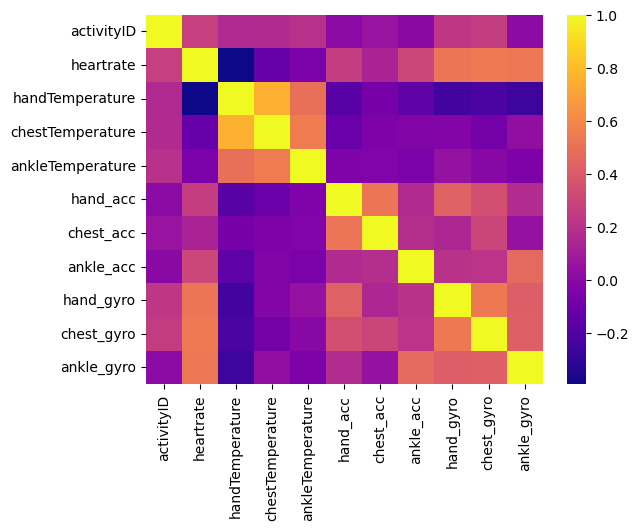

In [34]:
relation = last_df.drop(columns=["activity"])
correlation=relation.corr()
sns.heatmap(correlation,cmap="plasma")
plt.show()

here the temperatures are in some sort correlation.

In [35]:
relation.skew()

activityID          0.684498
heartrate           0.654066
handTemperature    -0.972009
chestTemperature   -0.569945
ankleTemperature   -0.892391
hand_acc            7.898049
chest_acc           4.566323
ankle_acc           6.450678
hand_gyro           2.017155
chest_gyro          3.087269
ankle_gyro          1.738746
dtype: float64

In [36]:
relation.kurtosis()

activityID           -0.759938
heartrate             0.071127
handTemperature       0.758284
chestTemperature     -0.421025
ankleTemperature      0.209325
hand_acc            106.767685
chest_acc            56.846940
ankle_acc            82.224220
hand_gyro             6.727266
chest_gyro           20.331622
ankle_gyro            2.748251
dtype: float64

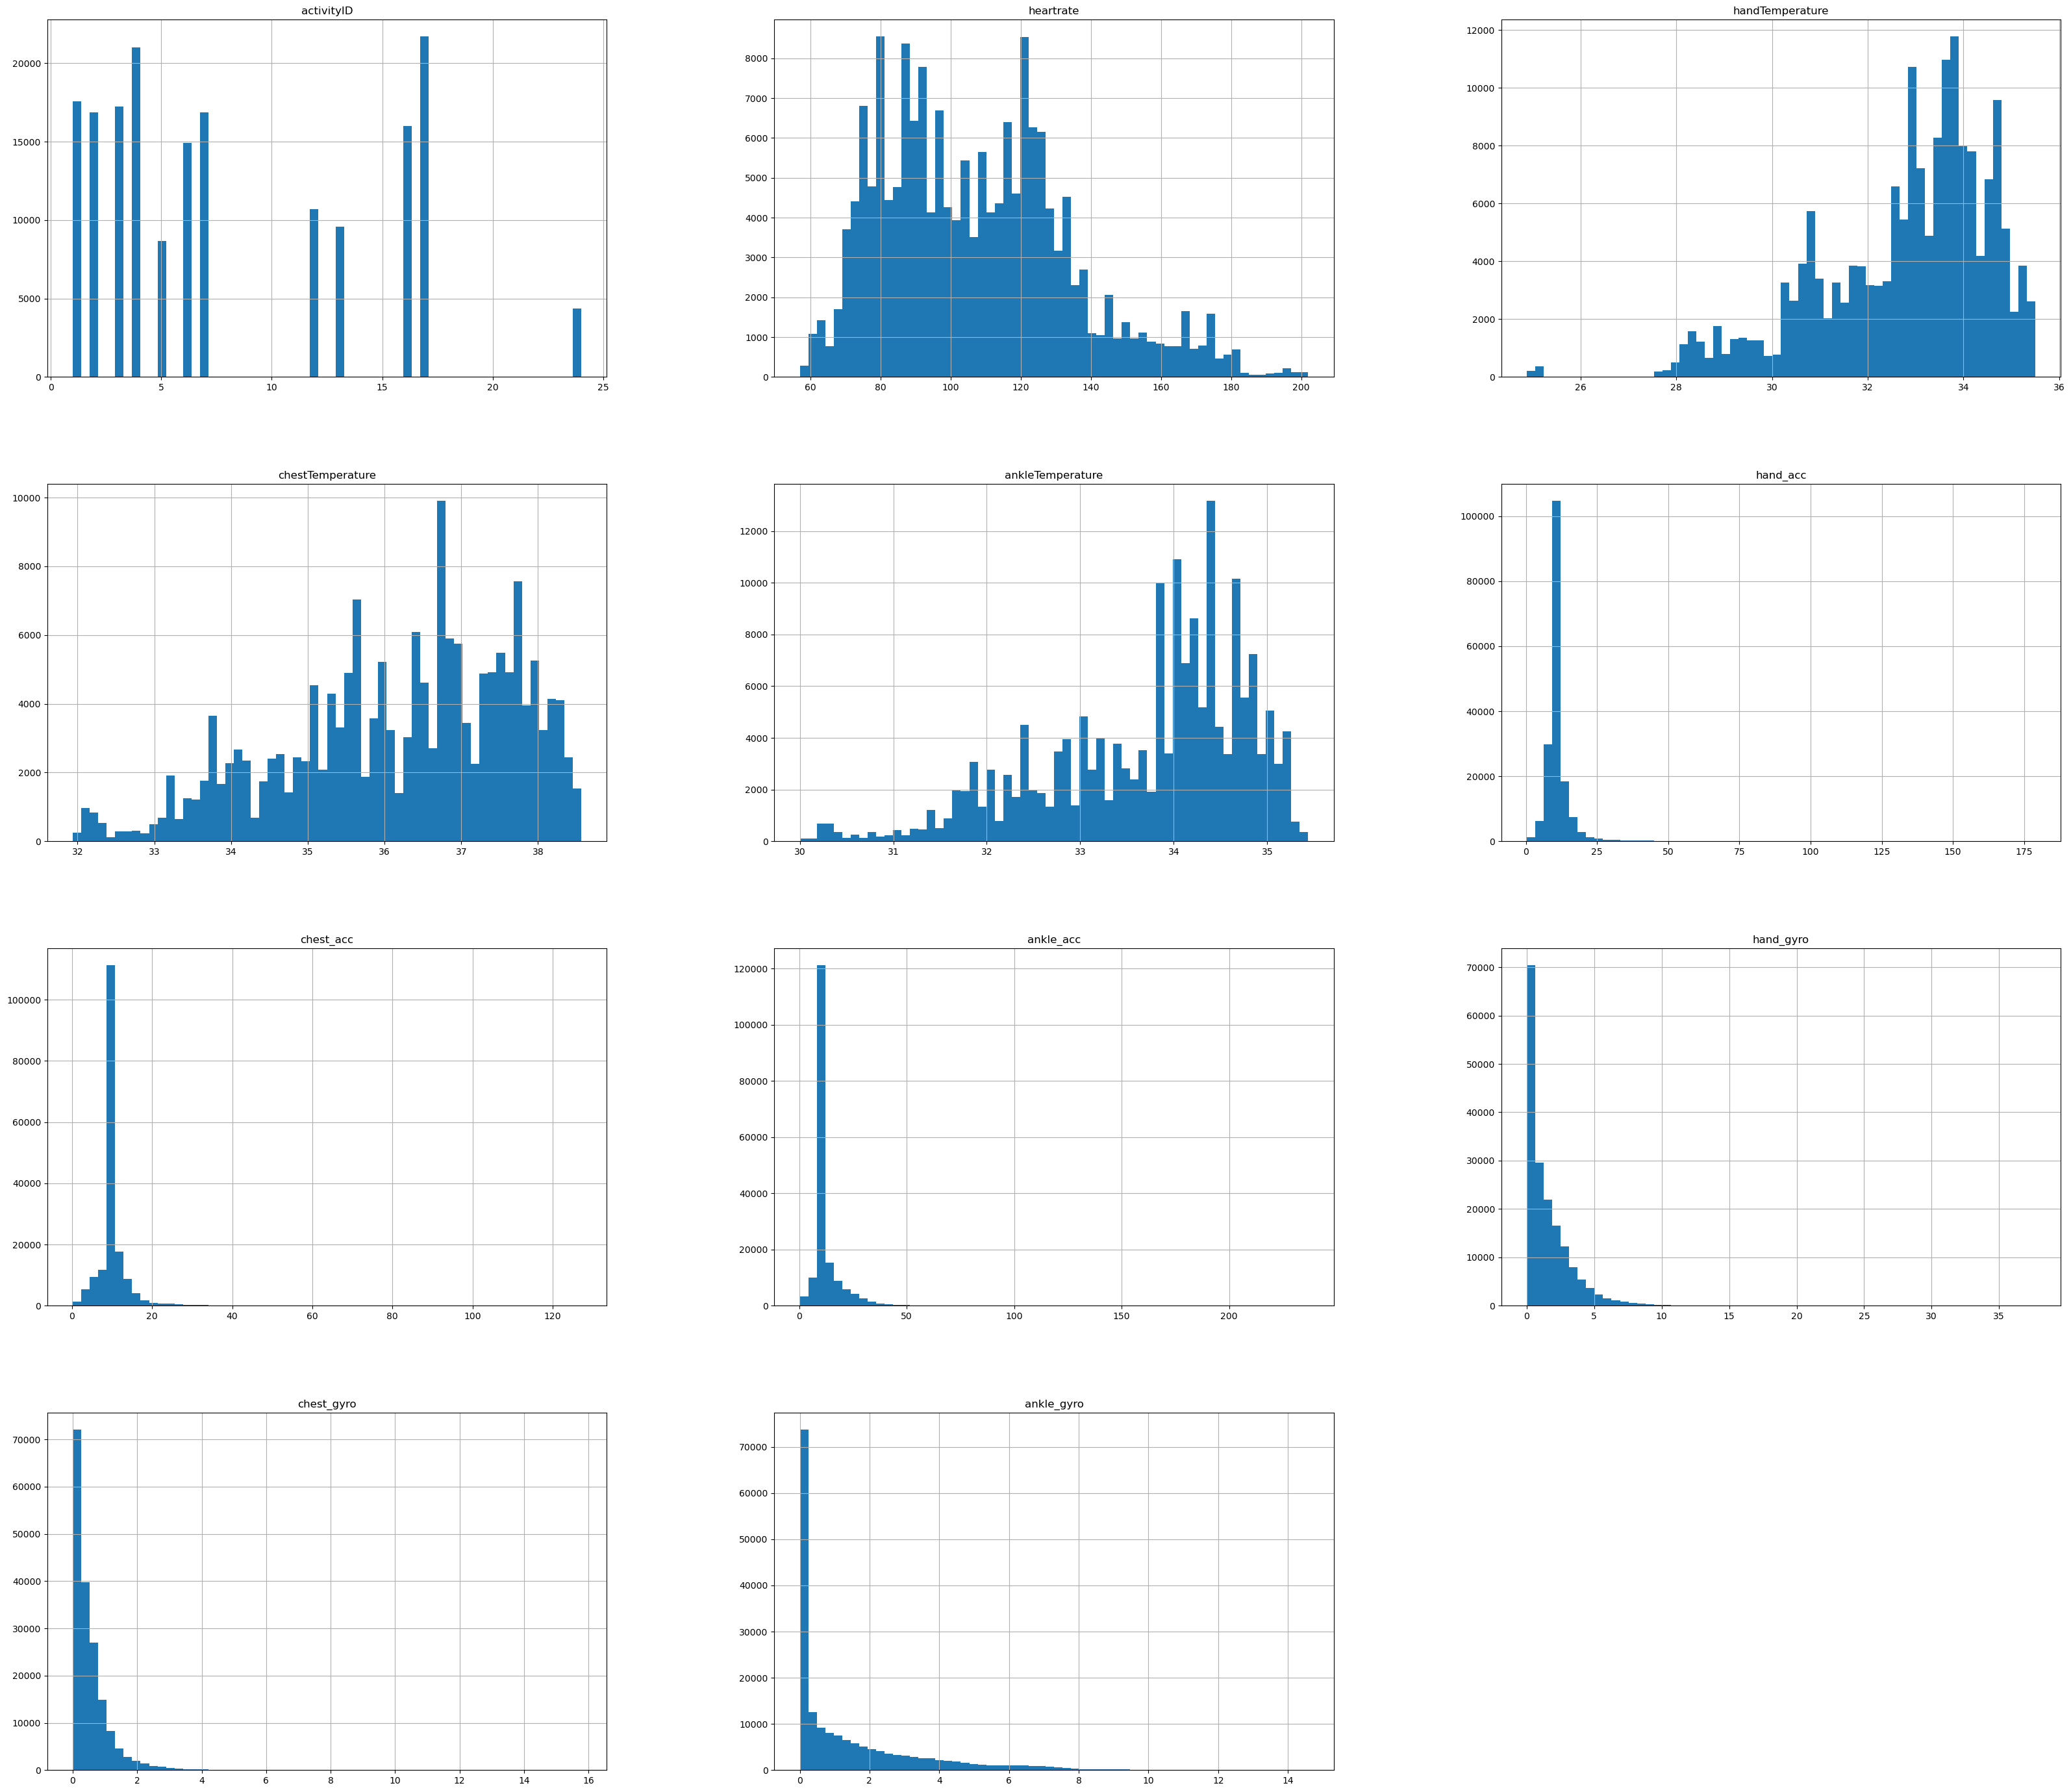

In [37]:
last_df.hist(figsize=(40,35),bins=60)
plt.show()


Most of the features are not in normal distribution and some do have outliers.  
here we are not dealing with outliers.

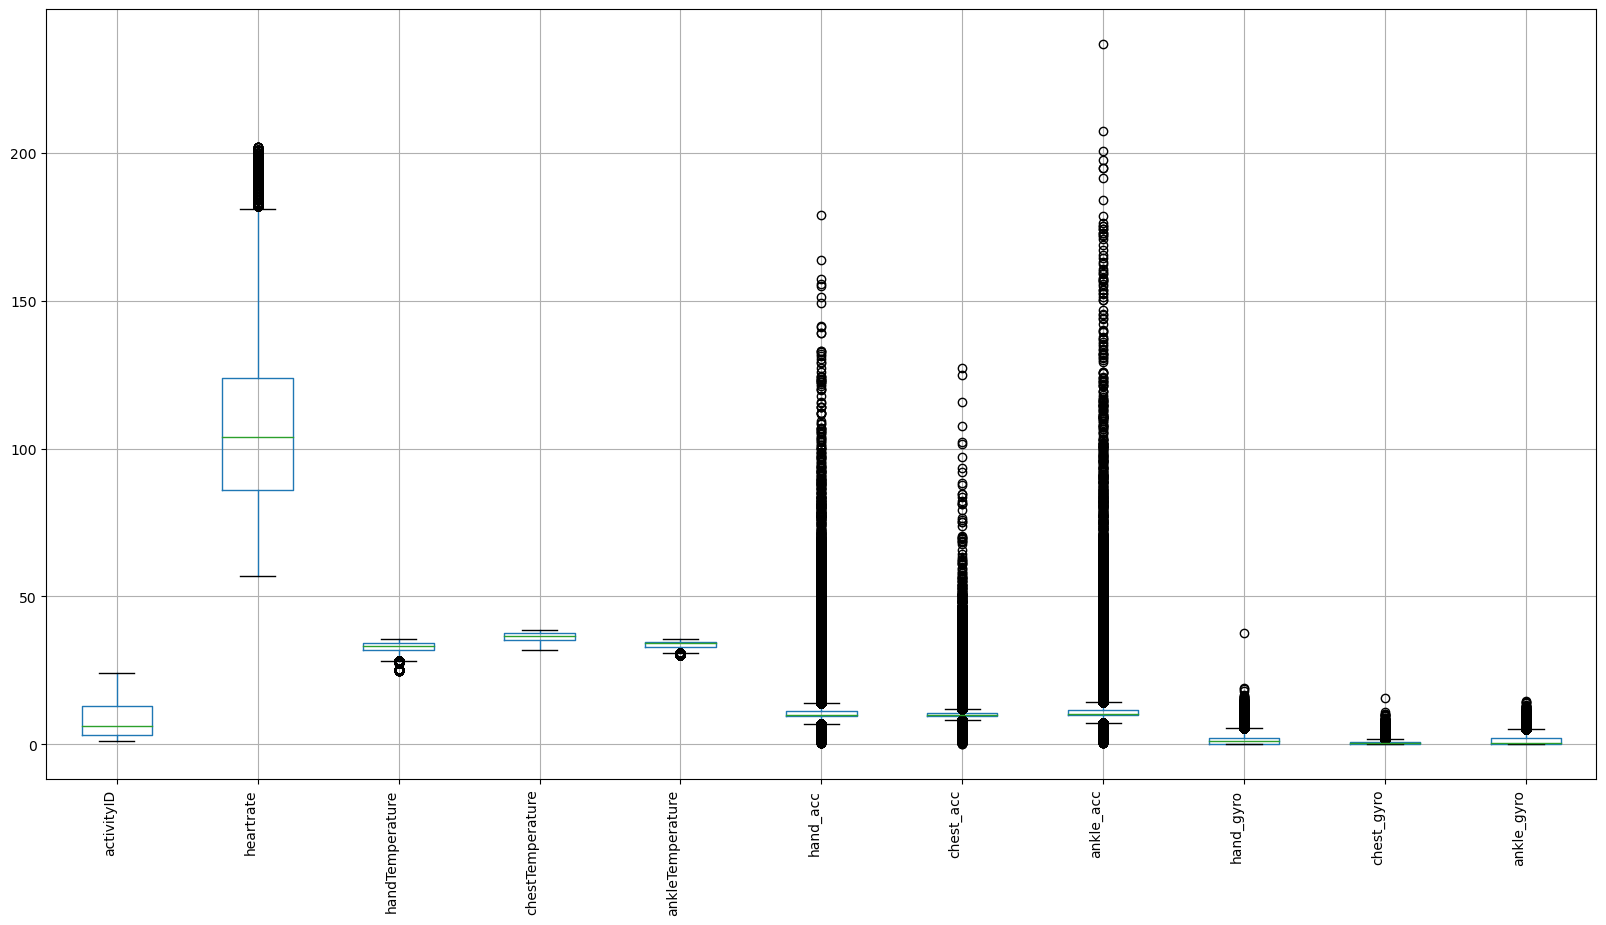

In [38]:
last_df.boxplot(figsize=(20,10))
plt.xticks(rotation=90, ha='right')
plt.show()

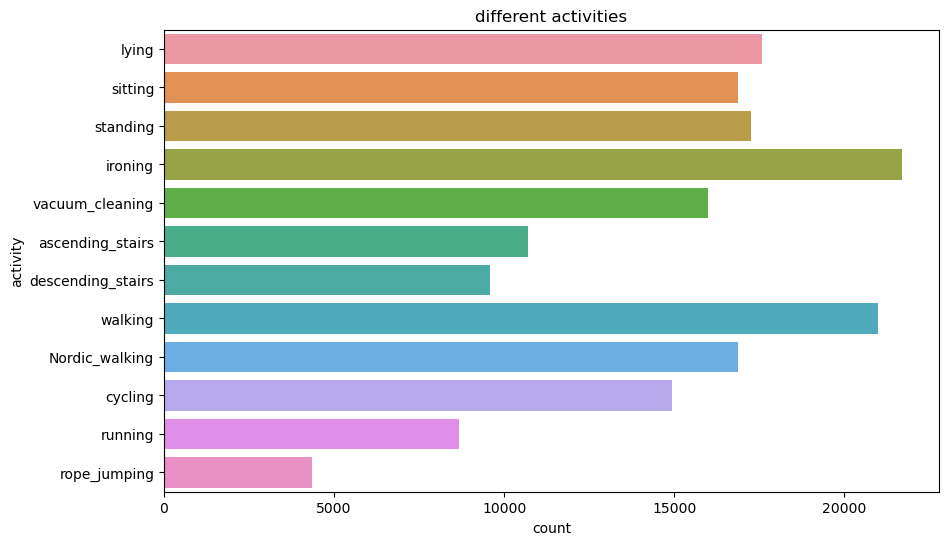

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(y="activity",data=last_df)
plt.title("different activities")
plt.show()

Bi variate analysis

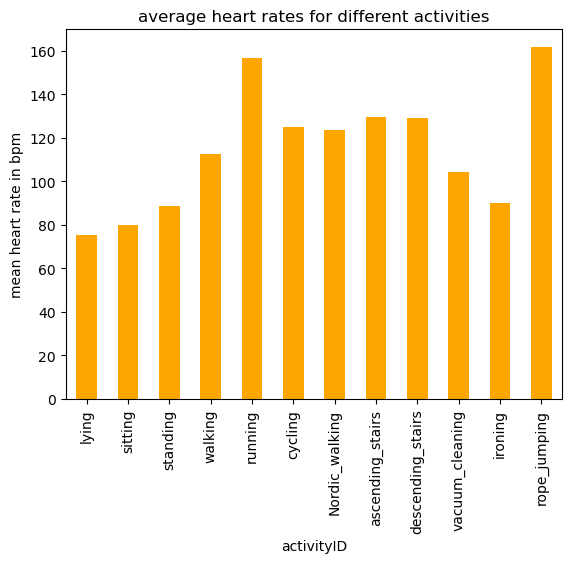

In [40]:
heart_mean = last_df["heartrate"].groupby(last_df["activityID"]).mean()
heart_mean.index = heart_mean.index.map(activityIDdict)
heart_mean.plot(kind="bar",color="orange")
plt.ylabel("mean heart rate in bpm")
plt.title("average heart rates for different activities")
plt.show()

From the above bar graph we can observe that for Regular activities the average heart rate of people is around **70 to 80 bpm**. and for some strain activites it is almost **120-130 bpm**.At last, for Forceful activities the average heart rate roose up to **160 bpm** which is **rope_jumping**.

For finding hand,chest and ankle acceleration

In [41]:
#hand,chest and ankle average acceleration
hand_acc_avg = last_df["hand_acc"].groupby(last_df["activityID"]).mean() - 9.81
#reduction of 9.81(acceleration due to gravity) gives the much more better intuition of body parts movement
chest_acc_avg = last_df["chest_acc"].groupby(last_df["activityID"]).mean() - 9.81
ankle_acc_avg = last_df["ankle_acc"].groupby(last_df["activityID"]).mean() - 9.81

In [42]:
hand_acc_avg.index = hand_acc_avg.index.map(activityIDdict)
chest_acc_avg.index = chest_acc_avg.index.map(activityIDdict)
ankle_acc_avg.index = ankle_acc_avg.index.map(activityIDdict)

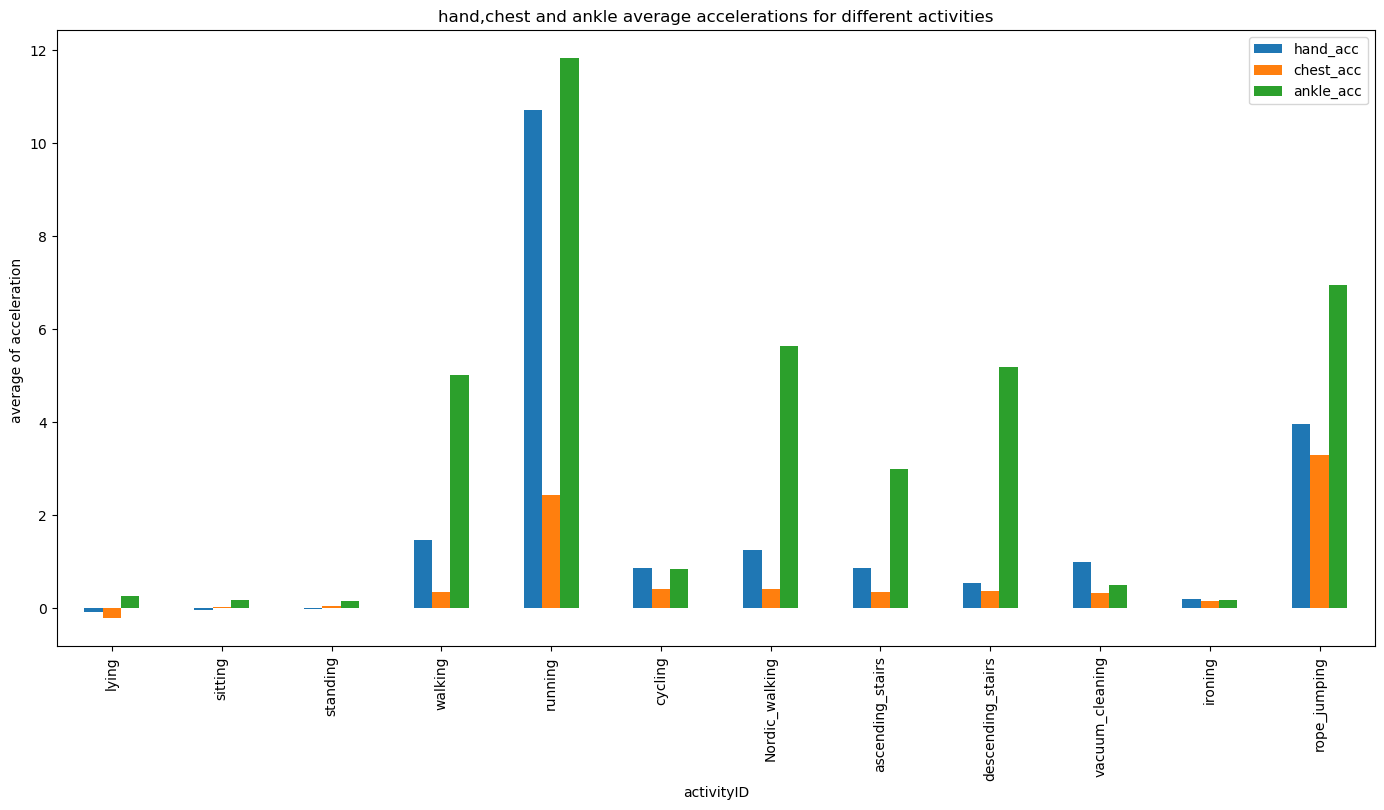

In [43]:
acc_avg = pd.concat([hand_acc_avg,chest_acc_avg,ankle_acc_avg],axis=1)
#adding the all the averages together to plot one graph.
acc_avg.plot(kind ="bar",figsize=(17,8))
plt.ylabel("average of acceleration ")
plt.title("hand,chest and ankle average accelerations for different activities")
plt.show()

For common activities like sitting ,lying etc.., the Acceleration is much low.  
But for running and rope jumping the acceleration is much more.Here Ankle acceleration is more in all activities.   
On other hand chest Acceleration is low for all activities.

gyrometer analysis for chest,hand and Ankle

In [44]:
all_activities=list()

In [45]:
hand_gyro_avg = last_df["hand_gyro"].groupby(last_df["activityID"]).mean()
chest_gyro_avg = last_df["chest_gyro"].groupby(last_df["activityID"]).mean()
ankle_gyro_avg = last_df["ankle_gyro"].groupby(last_df["activityID"]).mean()

hand_gyro_avg.index = hand_gyro_avg.index.map(activityIDdict)
chest_gyro_avg.index = chest_gyro_avg.index.map(activityIDdict)
ankle_gyro_avg.index = ankle_gyro_avg.index.map(activityIDdict)

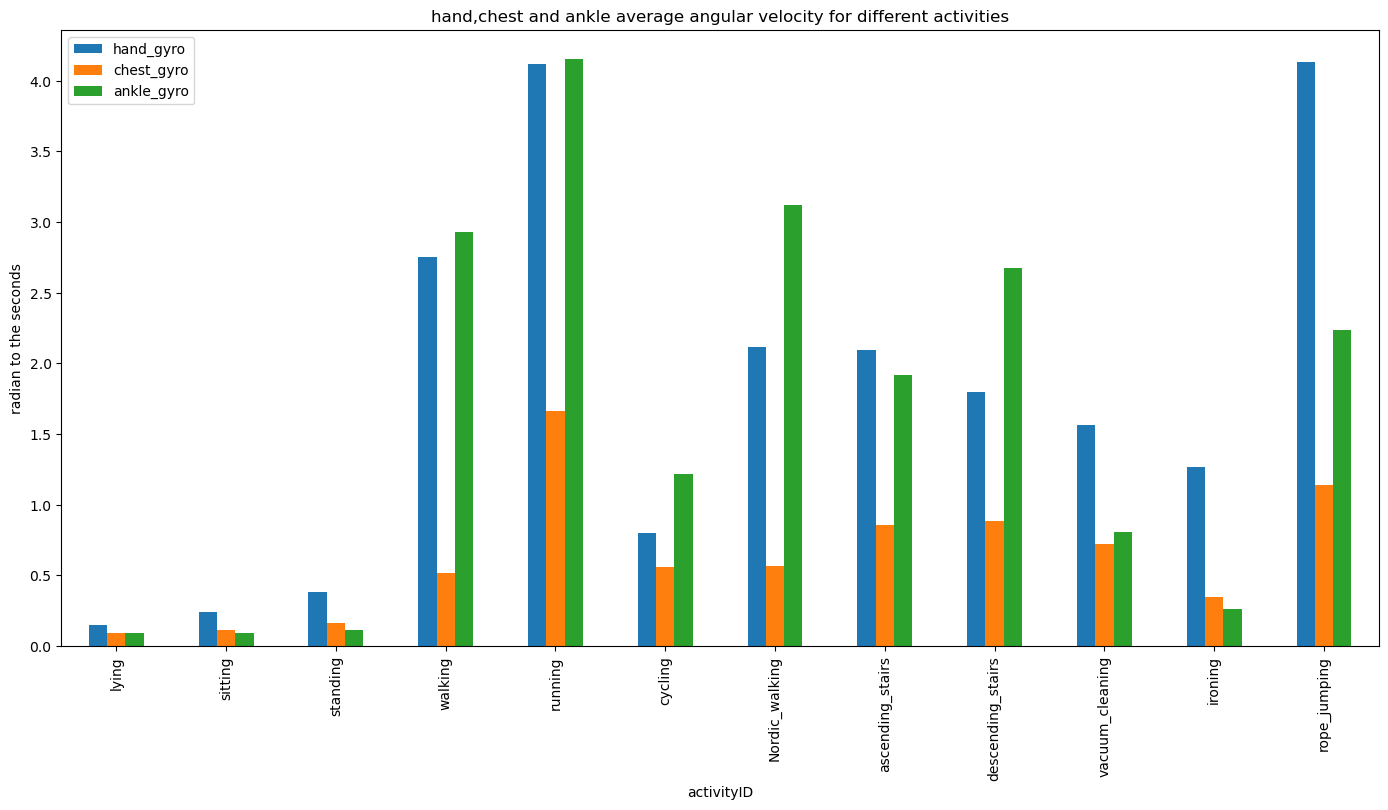

In [46]:
angular_velocity = pd.concat([hand_gyro_avg,chest_gyro_avg,ankle_gyro_avg],axis=1)
angular_velocity.plot(kind='bar',figsize=(17,8))
plt.ylabel("radian to the seconds")
plt.title("hand,chest and ankle average angular velocity for different activities")
plt.show()

Here Hand angular velocity is more than chest and ankle.  
As expected the angular velocity for easy activities are lower.  
And Angular Velocity is more for Running and rope jumping the rigorous works.

In [47]:
all_activities=list(hand_gyro_avg.index)
all_activities

['lying',
 'sitting',
 'standing',
 'walking',
 'running',
 'cycling',
 'Nordic_walking',
 'ascending_stairs',
 'descending_stairs',
 'vacuum_cleaning',
 'ironing',
 'rope_jumping']

# Mathematical modelling  
*
Our moto is to develop a hardware that detect's the activity performed by the people.  
So, we need to build the model for detecting the activity of a person.  
As our target variable is having **discrete data** we need to go for a **classification** algorithm that will predict the activity of a person.  
Here, we are using **Random Forest Algorithm** for prediction.

In [48]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

# monitoring the heart rate using tempature and acceleration

In [49]:
last_df.columns

Index(['activityID', 'heartrate', 'handTemperature', 'chestTemperature',
       'ankleTemperature', 'activity', 'hand_acc', 'chest_acc', 'ankle_acc',
       'hand_gyro', 'chest_gyro', 'ankle_gyro'],
      dtype='object')

In [50]:
acc_data = last_df.drop(columns=['hand_gyro', 'chest_gyro', 'ankle_gyro'])

In [51]:
target_data = acc_data["activity"]# the target variable

In [52]:
feed_data = acc_data.drop(columns=["activity"])# features data

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
#spliting the data into two parts as test and train
X_train,X_test,y_train,y_test = train_test_split(feed_data,target_data,test_size=0.2,random_state=52)


=0.

In [55]:
rand_model= RandomForestClassifier()#model object
rand_model.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
rand_model_pred = rand_model.predict(X_test)#predicting the test and train data
y_train_pred = rand_model.predict(X_train)

In [57]:
def metrics(true_y,pred_y):# metrics is a function used to print the accurary scores of a model
  accuracy = accuracy_score(true_y,pred_y)
  pre = precision_score(true_y,pred_y,average = None).mean()
  recall = recall_score(true_y,pred_y,average =None).mean()
  f1 = f1_score(true_y,pred_y,average=None).mean()
  print(f"The Accuracy is {accuracy}")
  print(f"The Precision is {pre}")
  print(f"Recall is {recall}")
  print(f"F1 score is {f1}")

In [58]:
def Confusion_matrix(true_y,predi_y):#it is function used to know how many values are predicted correctly and wrongly
  conmat = confusion_matrix(true_y,predi_y)
  plt.rcParams["figure.figsize"] = (17,9)
  disp = ConfusionMatrixDisplay(confusion_matrix= conmat,display_labels=all_activities)
  disp.plot(xticks_rotation ="vertical",cmap="binary")
  plt.show()


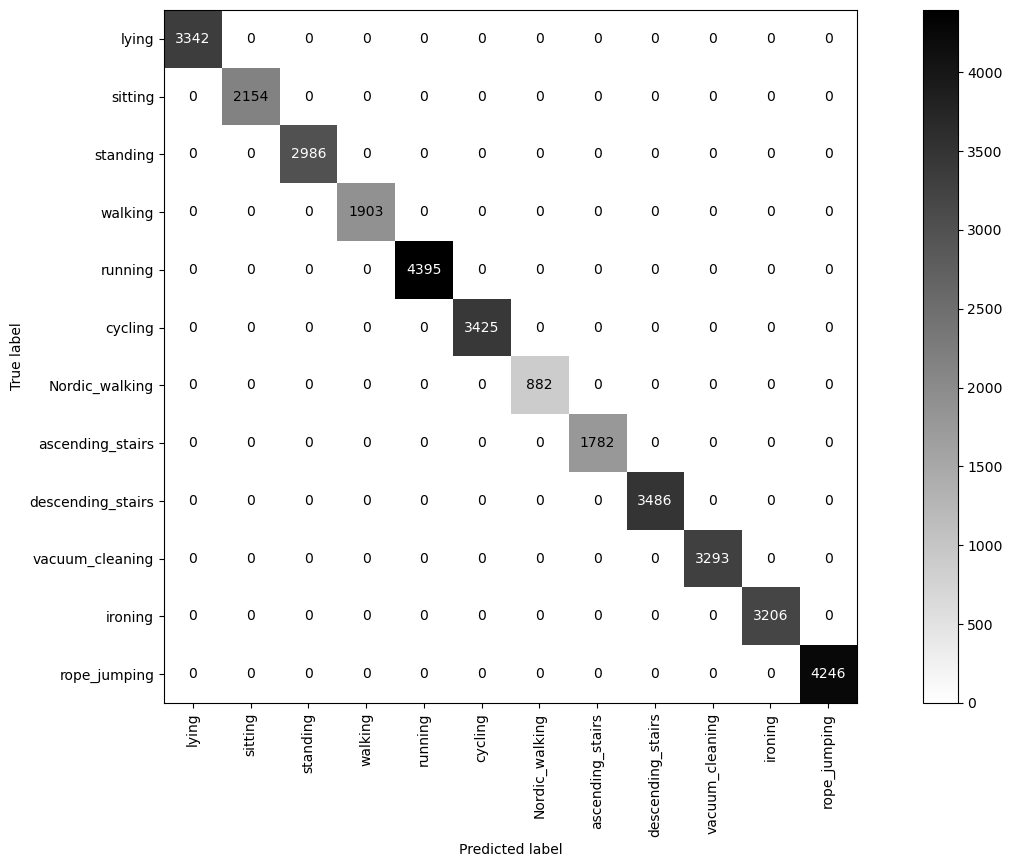

In [59]:
Confusion_matrix(y_test,rand_model_pred)

# MODEL Evaluation

In [60]:
metrics(y_train,y_train_pred)

The Accuracy is 1.0
The Precision is 1.0
Recall is 1.0
F1 score is 1.0


In [61]:
metrics(y_test,rand_model_pred)

The Accuracy is 1.0
The Precision is 1.0
Recall is 1.0
F1 score is 1.0


heart rate monitering using temperature and acceleration good predictions on both train and test datas.

# Hardware placed on hand

In [62]:
#build a df with no chest and ankle
hand_data=last_df.drop(columns = ['chest_acc', 'ankle_acc','chest_gyro', 'ankle_gyro'])

In [63]:
target_data1 = hand_data["activity"]# the target variable

In [64]:
feed_data1 = hand_data.drop(columns=["activity"])

In [65]:

X_train,X_test,y_train,y_test = train_test_split(feed_data1,target_data1,test_size=0.2,random_state=52)


In [66]:
rand_model1= RandomForestClassifier()#model object
rand_model1.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
rand_model_pred1 = rand_model1.predict(X_test)
y_train_pred1 = rand_model1.predict(X_train)

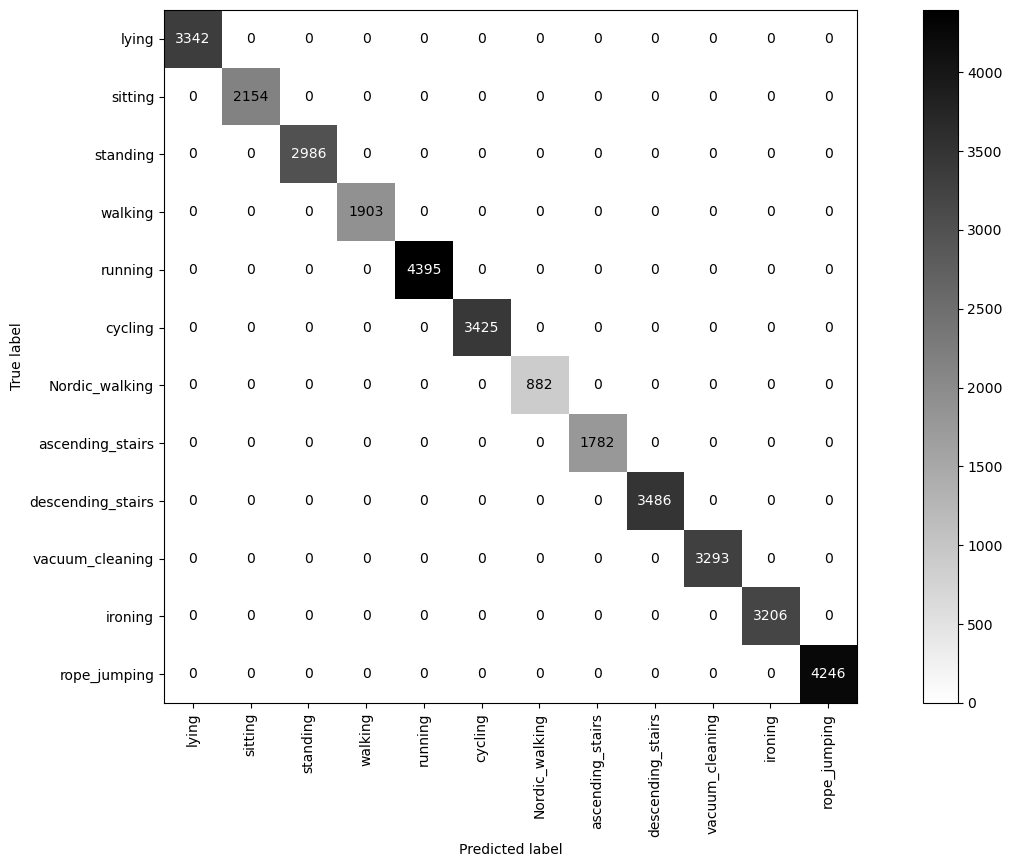

In [68]:
Confusion_matrix(y_test,rand_model_pred1)

model evaluation

In [69]:
metrics(y_train,y_train_pred1)

The Accuracy is 1.0
The Precision is 1.0
Recall is 1.0
F1 score is 1.0


In [70]:
metrics(y_test,rand_model_pred1)

The Accuracy is 1.0
The Precision is 1.0
Recall is 1.0
F1 score is 1.0


here our model is performing well and showing more accuracy on both train and test data.

# Hardware on ankle

In [71]:
last_df.columns

Index(['activityID', 'heartrate', 'handTemperature', 'chestTemperature',
       'ankleTemperature', 'activity', 'hand_acc', 'chest_acc', 'ankle_acc',
       'hand_gyro', 'chest_gyro', 'ankle_gyro'],
      dtype='object')

In [72]:
#create a dataframe with no sensor to chest and hand
ankle_data = last_df.drop(columns=['hand_acc', 'chest_acc','hand_gyro', 'chest_gyro'])

In [73]:
target_data2 = ankle_data["activity"]# the target variable

In [74]:
feed_data2 = ankle_data.drop(columns=["activity"])

In [75]:

X_train,X_test,y_train,y_test = train_test_split(feed_data2,target_data2,test_size=0.2,random_state=42)


In [76]:
rand_model2= RandomForestClassifier()#model object
rand_model2.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
rand_model_pred2 = rand_model2.predict(X_test)
y_train_pred2 = rand_model2.predict(X_train)

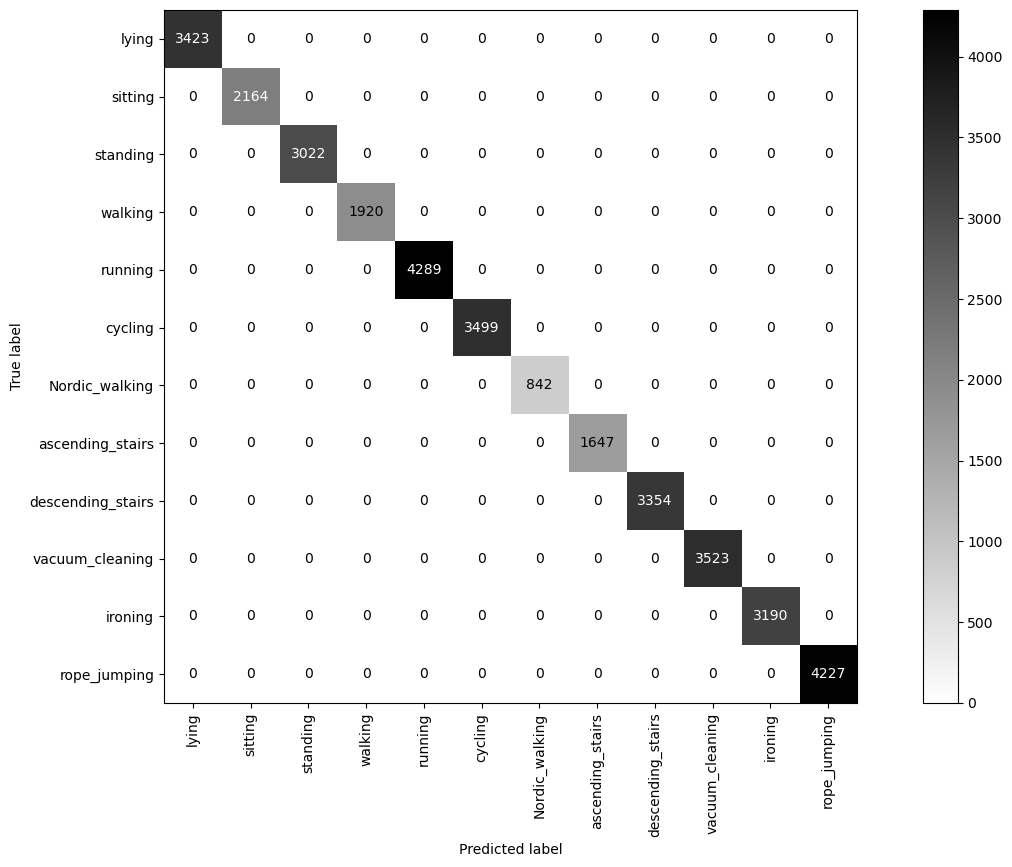

In [78]:
Confusion_matrix(y_test,rand_model_pred2)

model evaluation|

In [79]:
metrics(y_train,y_train_pred2)

The Accuracy is 1.0
The Precision is 1.0
Recall is 1.0
F1 score is 1.0


In [80]:
metrics(y_test,rand_model_pred2)

The Accuracy is 1.0
The Precision is 1.0
Recall is 1.0
F1 score is 1.0


here our Random Classifier model is performing well on both test and on train data.  
the hardware on ankle giving equal accuracy of that hand.  
so, by our model prediction it can be developed to use on hand on ankle.

# Sensor without temperature

In [81]:
last_df.columns

Index(['activityID', 'heartrate', 'handTemperature', 'chestTemperature',
       'ankleTemperature', 'activity', 'hand_acc', 'chest_acc', 'ankle_acc',
       'hand_gyro', 'chest_gyro', 'ankle_gyro'],
      dtype='object')

In [82]:
#build a df with no tempatures
no_temp = last_df.drop(columns=['handTemperature', 'chestTemperature','ankleTemperature'])

In [83]:
target_data3 = no_temp["activity"]# the target variable

In [84]:
feed_data3 = no_temp.drop(columns=["activity"])

In [85]:

X_train,X_test,y_train,y_test = train_test_split(feed_data3,target_data3,test_size=0.2,random_state=32)


In [86]:
rand_model3= RandomForestClassifier()#model object
rand_model3.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
rand_model_pred3 = rand_model3.predict(X_test)
y_train_pred3 = rand_model3.predict(X_train)

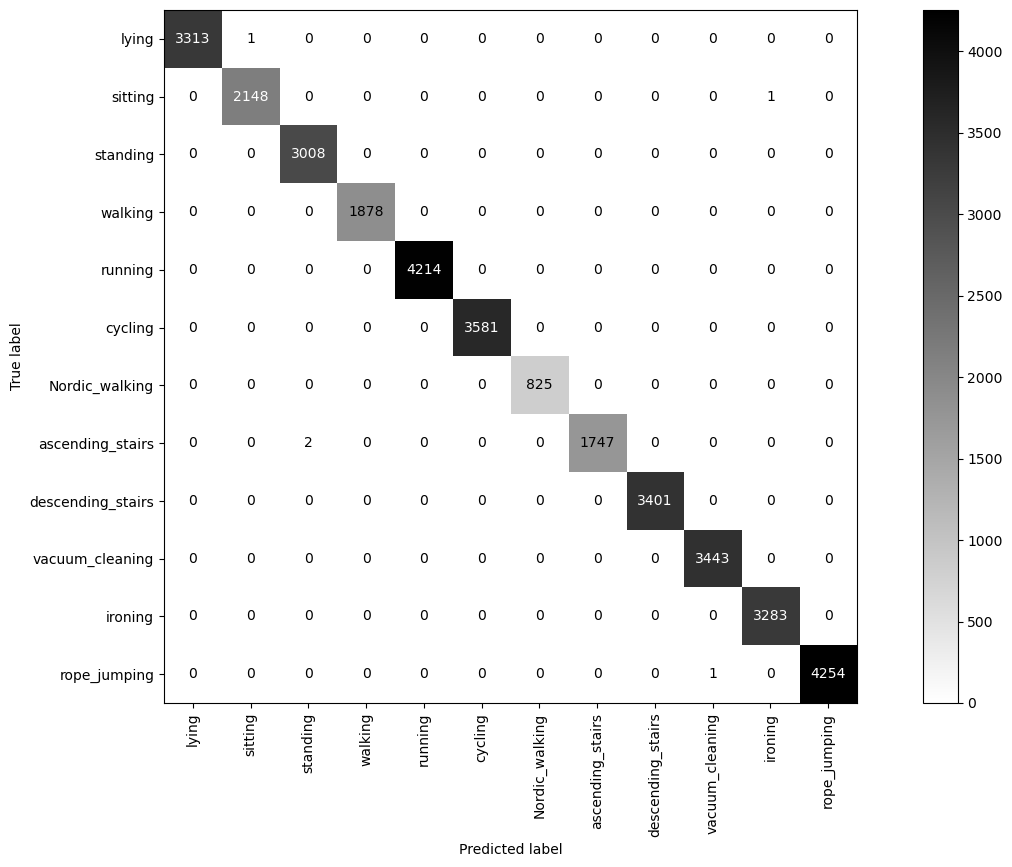

In [88]:
Confusion_matrix(y_test,rand_model_pred3)

model evaluation

In [89]:
metrics(y_train,y_train_pred3)

The Accuracy is 1.0
The Precision is 1.0
Recall is 1.0
F1 score is 1.0


In [90]:
metrics(y_test,rand_model_pred3)

The Accuracy is 0.9998575498575498
The Precision is 0.9998562790595219
Recall is 0.9998211990777034
F1 score is 0.9998386958733256


Here we can see clearly that taking off temperature features are making significant impact on the model accuracy.  
so, I would suggest the hardware must contain temperature sensor.

# Conclusion  
We revealed many valuable insights from the dataset provided for Monitoring the Physical Activities of people. First of all,we loaded the data from .dat to DataFrame by doing initial analysis on it. We came to know that there are some irrelevant columns that contributes nothing for the prediction and null values more than half of the data.After that we performed some statistics and Cleaning for getting Cleaned data for Analysis.
  
By performing Exploratory Data Analysis we understood that which features are playing cruial role in model building and for prediction through plotting some graphs and doing comparisons between them.Then stood with only usefull features for model building.  
    
As we need to predict the activity performed by the people ultimately it falls under classification problem.So,I choosen the Mathematical Model as Random Forest as it gives more accuracy on classification.As expected it given more accuracy on both train and test data without consuming more time as other algorithms.

  
In conclusion,I would reccommend to develop the hardware which should prioritize temperature sensor,based on my model it is not showing much difference in placing hardware to the hand or ankle.

# References    
* data science research methods module ppts and labworks,I manipulated according to my requirement.
* Archive.ics.uci.edu. (2012). UCI Machine Learning Repository: PAMAP2 Physical Activity Monitoring Data Set. [online] Available at: http://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring

* poseMethod Technique:Analysis of usain bolt's running technique Available at: https://posemethod.com/usain-bolts-running-technique/

* world Jump Rope records Avalilable at:https://jumpropehub.com/world-jump-rope-record/

* Talk accelerometer Available at:https://en.wikipedia.org/wiki/Talk%3AAccelerometer


In [91]:
filepath="phydat.ipynb"

In [92]:
import io
from nbformat import read
with io.open(filepath, "r", encoding="utf-8") as f:
    nb=read(f, 4)
word_count = 0
for cell in nb["cells"]:
    if cell.cell_type == "markdown":
        word_count += len(cell["source"].replace("#", "").lstrip().split(" "))
print(f"Submission length is {word_count}")

Submission length is 1188
